 
# Отчет по дисциплине «Machine learning».

### Задача классификации.

**Тема исследования: «German Credit DataSet»** 


**Введение:** 

Главной целью исследования является разбор задачи «Классификации». Ее суть заключается в том, чтобы верно распределять данные по нужным классам. Для этого необходимо выбрать результирующий признак, который и будем разделять на классы. Но начнём издалека. 

Что такое машинное обучение?
Машинное обучение представляет собой науку (и искусство) программирования
компьютеров для того, чтобы они могли обучаться на основе данных.

Приведем пример, рассмотрим фильтр спама.Фильтр спама-это программа МО, которая способна
научиться отмечать спам на заданных примерах спам-сообщений (возможно,
маркированных пользователями) и примерах нормальных почтовых сообщений
(не спама). Это очень яркий пример задачи классификации (разделение данных на нормальные письма и спам).

Примеры, которые система использует для обучения,
называются обучающим набором ( training set), а данные, на которых машина тренируется-тестовым набором(test set).

Смысл работы состоит в том, что нам предоставлена информация о банковской истории человека с многими дополнительными данными (имеет ли он дом, работает ли он или безработный, имеет ли кредит в другом банке и т.д). Необходимо предсказать, основываясь на данных, иностранный ли это гражданин или нет. 

**Ход работы:**

Итак, начнем исследование.
Для этого необходимо загрузить набор данных из источника в блокнот для дальнейшей работы.
Это можно сделать, использовав следующий код:


In [1121]:
#Загрузка необходимых библиотек
from __future__ import division, print_function, unicode_literals

import sys
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy as sp
import pandas as pd
import numpy as np
import IPython as IPy
import sklearn as skl
import mglearn as mgl
from sklearn.model_selection import train_test_split
import urllib
import joblib
import warnings
import os #модуль для работы с ОС
import tarfile #позволяет работать со сжатыми файлами .tar
from six.moves import urllib #для помощи в работе

In [1122]:
#загрузка данных из первоисточника
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
DATA_PATH = os.path.join("datasets","german") #присоединение пути
def load_data (data_url=DATASET_URL,data_path=DATA_PATH): #функция загрузки данных
    os.makedirs(data_path,exist_ok=True)
    data_path = os.path.join(data_path,"german.data")  #указываем название файла
    urllib.request.urlretrieve(data_url,data_path)
    return pd.read_csv(data_path,header=None,na_values="?")  #возвращаем объект pandas Dataframe
dataset=load_data() #вызываем функцию и присваиваем новой переменной, с которой и будем работать далее

Есть смысл посмотреть на данные, которые были загружены.

In [1123]:
dataset

,0
0,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 6...
1,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
2,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
3,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
4,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
...,...
995,A14 12 A32 A42 1736 A61 A74 3 A92 A101 4 A121 ...
996,A11 30 A32 A41 3857 A61 A73 4 A91 A101 4 A122 ...
997,A14 12 A32 A43 804 A61 A75 4 A93 A101 4 A123 3...
998,A11 45 A32 A43 1845 A61 A73 4 A93 A101 4 A124 ...


Нетрудно заметить, что данные находятся не в том виде, в котором нам хотелось бы. Здесь в явном виде лишь один столбец,а с такими данными работать крайне неудобно, поэтому следует разделить данные по столбцам.


In [1124]:
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
DATA_PATH = os.path.join("datasets","german") #присоединение пути
def load_data (data_url=DATASET_URL,data_path=DATA_PATH): #функция загрузки данных
    os.makedirs(data_path,exist_ok=True)
    data_path = os.path.join(data_path,"german.data")  #указываем название файла
    urllib.request.urlretrieve(data_url,data_path)
    return pd.read_csv(data_path,header=None,na_values="?", sep=" ")  #возвращаем объект pandas Dataframe и ставим разделитель
dataset=load_data() #вызываем функцию и присваиваем новой переменной, с которой и будем работать далее

In [1125]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


Другое дело! Но было замечено, что данные содержат лишний столбец, который следует пока убрать из набора данных (он может быть полезен впоследствии):

In [1126]:
dataset= dataset.drop(20, axis=1) #убрали столбец 
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


    Стоит отметить, что столбец, который мы должны предсказать- [19]: 
    А201-да,иностранный гражданин
    А202-нет, не иностранец.

Данные загружены! Далее необходимо подготовить данные для работы с алгоритмами МО. Есть необходимость посмотреть информацию о 
датасете, чтобы понять есть ли там пропущенные данные или данные, которые необходимо скорректировать для нормальной работы алгоритмов обучения:

In [1127]:
#Применим метод .info(), который отображает краткую сводку по всем аттрибутам набора данных
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
dtypes: int64(7), object(13)
memory usage: 156.4+ KB


    Видим, что в каждом из столбцов по 1000 значений, то есть пропущенных значений нет. Стоит отметить, что если бы таковые были следовало бы прибегнуть к одному из трех способов устранения этой проблемы:
    • избавиться от соответствующих округов;
    • избавиться от всего атрибута;
    • установить недостающие значения в некоторую величину (ноль, среднее,
    медиана и т.д.).
    Все варианты легко реализуются с использованием методов dropna(),
    drop() и fillna() объекта DataFrame.

Есть смысл проверить есть ли в данных значения, которые равны inf, чтобы также позаботиться об их обработке:

In [1128]:
for i in range (0, 20):
    for j in range (0, 999):
        if dataset[i][j] == np.nan:
            print(i)
            continue

Видим, что таковых значений нет.

Теперь отдельно рассмотрим числовые аттрибуты. 

In [1129]:
#применим метод describe()
dataset.describe()

,1,4,7,10,12,15,17
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


    Данный метод позволяет более широкую информацию о данных:
    min-минимальный элемент в столбце
    min-максимальный элемент в столбце
    mean-среднее значение
    count-количество элементов
    std-стандартное отклонение, которое измеряет разброс значений (квадратный корень из дисперсии (1)) 
    В строках 25%,50% и 75% приведены соответствующие процентили
    (percentile): процентиль указывает значение, ниже которого падает заданный процент наблюдений в группе замеров.

(1)- Квадратный корень из дисперсии это усреднение квадратичного отклонения от среднего значения. Когда признак имеет колоколообразное
нормальное распределение (также называемое распределением Гаусса), что
очень распространено, то применяется правило "68-95-99.7": около 68% значений находятся
внутри la среднего, 95% - внутри 2а и 99.7% - внутри За.

Еще один способ получения информации о данных- это их визуализация. Методы в scikit-learn позволяют строить гистограммы на основе 
аттрибутов, для облегченного понимания.
Необходимо использовать метод .hist()

### Визуализация

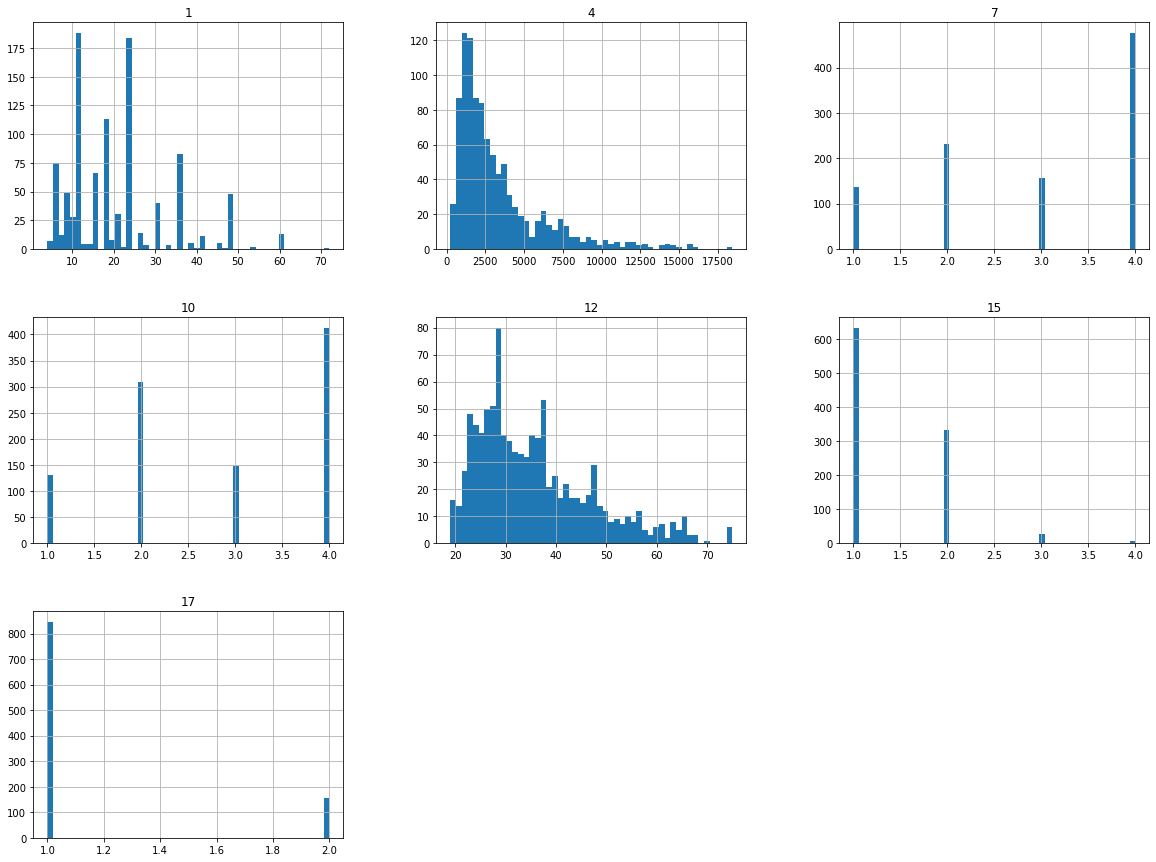

In [1130]:
#указываем сервер,где будем отображать (в тетради юпитер)
%matplotlib inline 
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15)) #hist() чертит гистограммы для каждого из столбцов
#save_fig("attribute_histogram_plots")
plt.show() #отобразить на экране

### Матрица Корреляции

Рассмотрим матрицу корреляции. Она показывают насколько два или более случайно взятых параметра из датасета влияют друг на друга.
Говоря научным языком, Корреляция  — взаимосвязь двух или более случайных величин. При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

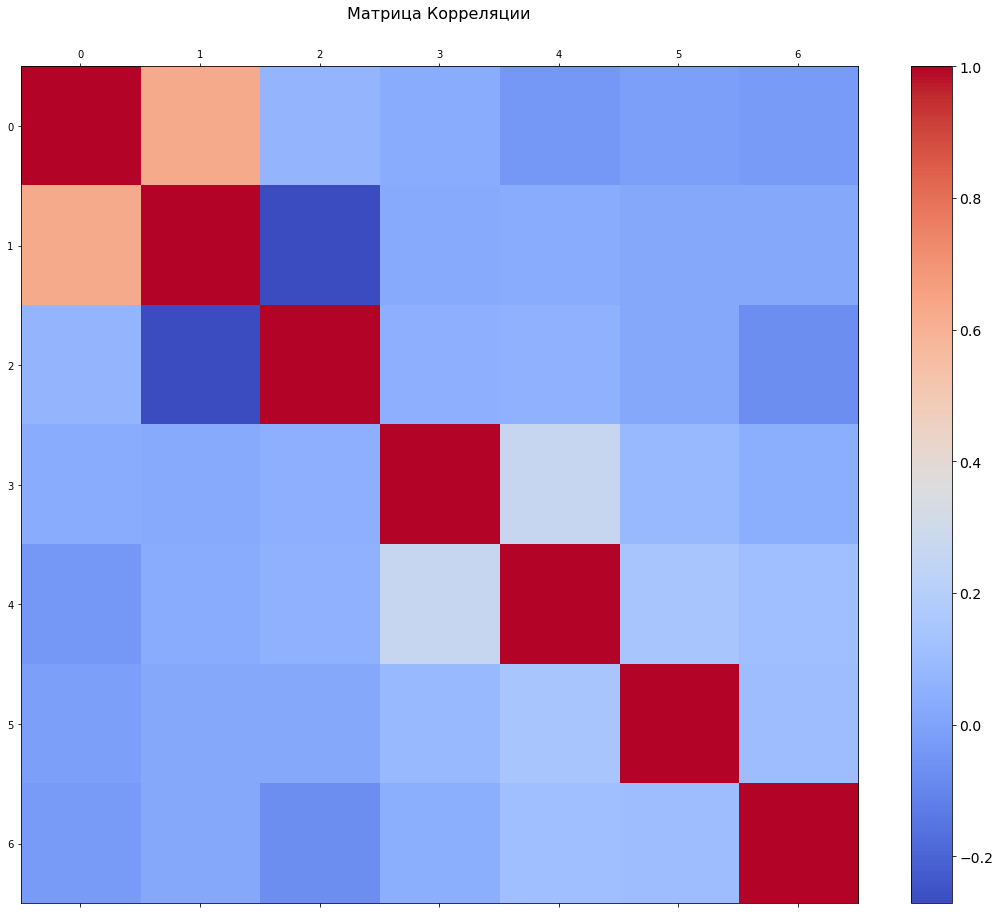

In [1131]:
fig = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=fig.number, cmap = "coolwarm")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Матрица Корреляции', fontsize=16); 

Анализируя матрицу корреляции, можно сказать что в наборе данных присутствует строго отрицательная корреляция. (то есть, при изменении
                                                                                                               одного параметра, другой 
                                                                                                               меняется в обратную сторону)

Далее стоит позаботиться об обработке категориальных и текстовых признаков. Большинство алгоритмов МО предпочитают работать
с числами, так что надо преобразовать категории из текста в числа.

Но для начала обработки данных, следует выделить из датасета результирующий столбец

In [1132]:
dataset_cat_label = dataset[[19]]
dataset_cat_label.head(10)

,19
0,A201
1,A201
2,A201
3,A201
4,A201
5,A201
6,A201
7,A201
8,A201
9,A201


Превратим категориальные значения в числовые.Для
этого можно применить метод OrdinalEncoder , который сопоставляет
каждую категорию с отличающимся целым числом:

In [1133]:
from sklearn.preprocessing import OrdinalEncoder #импортируем библиотеку
ordinal_encoder = OrdinalEncoder() #загружаем метод
dataset_cat_encoded = ordinal_encoder.fit_transform(dataset_cat_label) #загружаем туда наш столбец
dataset_cat_encoded[:10] #выводим первые 10 значений

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Теперь обратно добавим наш столбец и посмотрим на наш набор данных

In [1134]:
dataset[19]=dataset_cat_encoded
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,0.0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,0.0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,0.0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,0.0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,0.0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,0.0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,0.0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,0.0


Как можно заметить, обработка прошла успешно

Всегда полезно знать, сколько и какие значения находятся в наших данных. Это можно проверить с помощью метода value_counts() и info()

In [1135]:
dataset[19].value_counts()

0.0    963
1.0     37
Name: 19, dtype: int64

Здесь мы видим, что данные не сбалансированы, значений 0 гораздо больше, чем 1. 

Для нашего удобства поменяем 0 и 1 местами, так как 1 соответствует значению(yes), а 0 значению(no).

In [1136]:
mask = (dataset[19] == 0)
dataset[19].loc[mask] = 2
mask1 = (dataset[19] == 1)
dataset[19].loc[mask1] = 0
mask2 = (dataset[19] == 2)
dataset[19].loc[mask2] = 1
dataset[19].value_counts()

C:\ANACONDA\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1.0    963
0.0     37
Name: 19, dtype: int64

In [1137]:
#с помощью метода info() посмотрим на свойства данных
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       1000 non-null   int64  
 2   2       1000 non-null   object 
 3   3       1000 non-null   object 
 4   4       1000 non-null   int64  
 5   5       1000 non-null   object 
 6   6       1000 non-null   object 
 7   7       1000 non-null   int64  
 8   8       1000 non-null   object 
 9   9       1000 non-null   object 
 10  10      1000 non-null   int64  
 11  11      1000 non-null   object 
 12  12      1000 non-null   int64  
 13  13      1000 non-null   object 
 14  14      1000 non-null   object 
 15  15      1000 non-null   int64  
 16  16      1000 non-null   object 
 17  17      1000 non-null   int64  
 18  18      1000 non-null   object 
 19  19      1000 non-null   float64
dtypes: float64(1), int64(7), object(12)
memory usage: 156.4+ KB


Информация выше нам говорит о том, что в датасете много текстовых и категориальных признаков, это необходимо исправить для нормальной работы методов обучения. Код ниже создает списки вида признаков. Это необходимо для удобного обращения к ним и последующего исправления

In [1138]:
num_attribs = [] #номер столбцов числовых признаков
label_attribs = [0, 5, 6] 
cat_attribs = [] #номера категориальных признаков

#цикл проходит по данным и заносит столбцы в списки категориальных признаков, либо числоых, в зависимости от условия принадлежности типа
for i in range(0, 19):
    if i not in label_attribs:
        if dataset[i].dtype == "object":
            cat_attribs.append(i)
        else:
            num_attribs.append(i)
#вывыедем номера числовых признаков
num_attribs

[1, 4, 7, 10, 12, 15, 17]

### Разделение данных

Сейчас самое время разделить данные. 

Для применения к набору данных методов обучения, необходимо разделить данные на примеры, которые система использует для обучения,
называемые обучающим набором (training set) и на примеры, которые система использует для тестирования системы,
называемые тестовым набором (test set). Обычные пропорции 80 на 20 процентов, где 80 процентов обучающих данных,а 20 процентов-тестовых. 

    #X_train, X_test, y_train, y_test = X_prep[:800], X_prep[800:], y_data[:800], y_data[800:]
Мы можем сохранить способ разделения данных, как показано строкой выше. Но будет допущена неточность, которая впоследующем может
оказать влияние на результат.Присутствует риск привнесения значительного смещения выборки.
Необходимо провести стратифицированную выборку (stratified sampling): данные делятся на однородные подгруппы,
называемые стратами (strata), и из каждой страты извлекается правильное
число образцов, чтобы гарантировать репрезентативность испытательного
набора для всего набора данных.

Также стоит отметить, что стратифицированную выборку мы провели на основе 
прогнозируемого результата (то есть результируещего столбца, 
                            значения которого модель должна предсказать)

In [1139]:
from sklearn.model_selection import StratifiedShuffleSplit
#тут указываем Кол-во итераций перетасовки и процентное соотношение тестовой и тренировочной выборки (0.8 и 0.2)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42) 
for train_index, test_index in split.split(dataset,dataset[19]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [1140]:
X_train_raw= strat_train_set.drop(19, axis=1)
y_train = strat_train_set[19].copy()
X_test_raw = strat_test_set.drop(19, axis=1) #получаем тестовые данные, 
y_test = strat_test_set[19].copy() #и столбец, значения которого должны предсказать
y_train.value_counts() #данные перетосавались, но их соотношение между собой не изменилось, проверим (кол-во 0 и 1 осталось таким же)

1.0    770
0.0     30
Name: 19, dtype: int64

 Для удобной обработки данных в правильном порядке в Scikit-Learn были созданы конвейеры трансформации(pipeline).

In [1141]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler #функция масштабирования


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

label_pipeline = Pipeline([('encoder', OrdinalEncoder()),
                           ('imputer', SimpleImputer(strategy="median")),
                           ('mm_scaler', MinMaxScaler()),
                          ])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy="most_frequent")), #fill_value='0'
                         ('encoder', OneHotEncoder()),
                        ])

Конструктор Pipeline принимает список пар "имя/оценщик', определяющий
последовательность шагов. Все кроме последнего оценщика обязаны быть
трансформаторами (т.е. они должны иметь метод fit_transform()). Имена
могут быть какими угодно (пока они не содержат два подчеркивания (_)).
Вызов метода fit() конвейера приводит к последовательному вызову методов
fit_transform() всех трансформаторов с передачей вывода каждого
вызова в качестве параметра следующему вызову до тех пор, пока не будет достигнут
последний оценщик, для которого просто вызывается метод fit().
Конвейер открывает доступ к тем же самым методам, что и финальный оценщик.
В текущем примере последним оценщиком является StandardScaler,
представляющий собой трансформатор, поэтому конвейер имеет метод
transform(), который применяет все трансформации к данным в последовательности
(в нем также есть метод fit_transform(), который можно
было бы использовать вместо вызова fit() и затем transform()).

Теперь необходимо применить конвейеры к номерам наших столбцов. Это делается с помощью метода ColumnTransformer из sklearn.compose

In [1142]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), 
                                   ("label", label_pipeline, label_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])
#создали конвейр и с помощью метода fit_transform() поместили туда датасет.
X_train = full_pipeline.fit_transform(X_train_raw) #подготовленные данные
X_test = full_pipeline.fit_transform(X_test_raw) #подготовленные данные

Для единой стилизации и для дальнейшей работы, приведем наши данные к типу объекта Dataframe

In [1143]:
X_prep = pd.DataFrame(X_train)
X_prep #посмотрим на нашим данные

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.470588,0.395180,0.333333,0.333333,0.625000,0.000000,0.0,0.333333,0.00,0.50,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.647059,0.137614,1.000000,0.666667,0.339286,0.333333,1.0,1.000000,1.00,1.00,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.294118,0.122868,1.000000,1.000000,0.053571,0.000000,0.0,0.000000,0.50,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.117647,0.055464,0.333333,1.000000,0.053571,0.333333,0.0,1.000000,0.00,0.25,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.294118,0.082811,1.000000,1.000000,0.696429,0.000000,0.0,0.000000,0.00,1.00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.205882,0.111588,0.666667,0.666667,0.160714,0.333333,0.0,0.333333,0.25,0.25,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
796,0.294118,0.070155,1.000000,0.666667,0.267857,0.000000,1.0,1.000000,0.75,0.75,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
797,0.338235,0.174205,0.666667,0.333333,0.142857,0.000000,0.0,0.000000,0.00,0.50,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
798,0.088235,0.107846,0.333333,0.333333,0.107143,0.000000,0.0,1.000000,0.00,0.50,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1144]:
X_prep_test = pd.DataFrame(X_test)

Теперь видно, что количество столбцов увеличилось. Это произошло из-за разбиения текстовых признаков методом OneHotEncoder.Он предназначен для преобразования
целочисленных категориальных значений в векторы в унитарном коде.

In [1145]:
X_train #посмотрим на тренировочные данные

array([[0.47058824, 0.39517993, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.64705882, 0.13761417, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.29411765, 0.12286783, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33823529, 0.17420491, 0.66666667, ..., 1.        , 1.        ,
        0.        ],
       [0.08823529, 0.10784637, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.14427204, 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

Попробуем применять разные методы обучения для получения оптимального результата.

In [1146]:
y_train

815    1.0
787    1.0
743    1.0
797    1.0
83     1.0
      ... 
556    1.0
327    1.0
142    1.0
864    1.0
160    1.0
Name: 19, Length: 800, dtype: float64

Попробуем применять методы обучения. Сначала будем проверять их на обучающем наборе.

### RandomForestClassifier

In [1147]:
from sklearn.ensemble import RandomForestClassifier #загрузка библиотек
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
forest_clf=RandomForestClassifier(random_state = 42) #получение модели
forest_clf.fit(X_train, y_train) #применение метода fit , то есть загрузили данные для обучения
score = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy") #рассмотрим оценку модели,cross_val_score
print("Суммы оценок RandomForest: {}; Среднее: {}".format(score, np.mean(score))) #можем сделать вывод о качестве модели

Суммы оценок RandomForest: [0.96254682 0.96254682 0.96240602]; Среднее: 0.962499882665465


In [1148]:
y_pred = forest_clf.predict(X_train) #применяем метод predict для получения полученного столбца,который выдала модель
#y_pred=cross_val_predict(forest_clf, X_train, y_train, cv=3)

Для более показательного результата, создадим матрицу неточностей (confusion  matrix).

Confusion matrix-очень хороший способ оценки производительности классификатора. Общая
идея заключается в том, чтобы подсчитать, сколько раз образцы класса А
были отнесены к классу В.
Для расчета матрицы неточностей сначала понадобится иметь набор прогнозов (y_pred),
чтобы их можно было сравнивать с фактическими целями.

Каждая строка в матрице неточностей представляет фактический класс,
а каждый столбец - спрогнозированный класс. Первая строка матрицы учитывает
изображения не пятерок (отрицательный класс (negative class) ):
0 их них были корректно классифицированы как не 1.0 ("yes") (истинно
отрицательные классификации (true negative - TN)), тогда как оставшиеся
30 были ошибочно классифицированы как "yes" (ложноположительные
классификации (false positive - FP)). Вторая строка матрицы учитывает когда "yes"(положительный класс (positive class)): 0 были ошибочно
классифицированы как не "yes" (ложноотрицательные классификации
(false negative - FN) ), в то время как оставшиеся 770 были корректно классифицированы
как "yes" (истинно положительные классификации ( true
positive - ТР)). Безупречный классификатор имел бы только истинно положительные
и истинно отрицательные классификации, так что его матрица
неточностей содержала бы ненулевые значения только на своей главной диагонали
(от левого верхнего до правого нижнего угла)

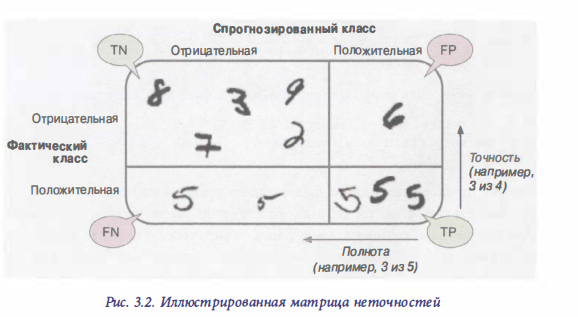

In [1149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)
conf_mx = confusion_matrix(y_train, y_pred) #посылаем предсказанные значения и истинные
conf_mx

array([[ 30,   0],
       [  0, 770]], dtype=int64)

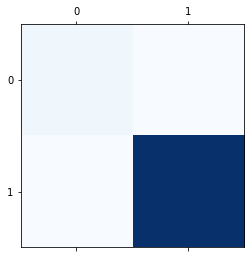

In [1150]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) #метод для отображения матрицы (можно указать более пдходящий стиль)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show() #выведем матрицу на экран

Можем пронаблюдать, что главная диагональ матрицы четко выделяется. На остальных позициях стоят 0, следовательно метод работает идельно.Может ли быть такое? Есть подозрения на переобучение модели. Это происходит из-за того что алгоритмы деревьев решения не ошибаются на тренировочных данных. Варианты исправления: Использовать cross_val_predict

### DecisionTreeClassifier

Применим все те же методы fit и predict теперь для DecisionTreeClassifier

In [1151]:
from sklearn.tree import DecisionTreeClassifier
Tree_clf = DecisionTreeClassifier(random_state=42)
Tree_clf.fit(X_train, y_train)
score = cross_val_score(Tree_clf, X_train, y_train, cv=10, scoring="accuracy") #рассмотрим оценку модели,которая разбивает данные на cv блоков
print("Суммы оценок DecisionTree: {}; Среднее: {}".format(score, np.mean(score)))

Суммы оценок DecisionTree: [0.95   0.925  0.875  0.9625 0.9125 0.925  0.95   0.925  0.9625 0.875 ]; Среднее: 0.9262499999999999


In [1152]:
#y_pred = Tree_clf.predict(X_train)
y_pred=cross_val_predict(Tree_clf, X_train, y_train, cv=10)

In [1153]:
confusion_matrix(y_train, y_pred)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[  6,  24],
       [ 35, 735]], dtype=int64)

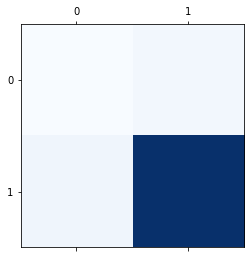

In [1154]:
plt.matshow(conf_mx, cmap=plt.cm.Blues) #метод для отображения матрицы (можно указать более пдходящий стиль)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show() #выведем матрицу на экран

Теперь видим совершенно другую картину. Алгоритм выполняется достаточно плохо, много falsepositive срабатываний. Скорее всего это происходит из-за того, что датасет не сбалансирован, относительно предсказываемого признака.

### KNeighborsClassifier

Рассмотрим KNeighborsClassifier

In [1155]:
from sklearn.neighbors import KNeighborsClassifier
#попробуем модель при разных значениях кол-во соседей
for n_neighbors in range (1, 10): 
    KN_clf = KNeighborsClassifier(n_neighbors,algorithm='brute')
    KN_clf.fit(X_train, y_train)
    score = cross_val_score(KN_clf, X_train, y_train, cv=2, scoring="accuracy")
    print("Суммы оценок KN_clf с {} соседями : {}; Среднее: {}".format(n_neighbors, score, np.mean(score)))

Суммы оценок KN_clf с 1 соседями : [0.9425 0.9225]; Среднее: 0.9325
Суммы оценок KN_clf с 2 соседями : [0.915  0.8975]; Среднее: 0.90625
Суммы оценок KN_clf с 3 соседями : [0.9575 0.96  ]; Среднее: 0.95875
Суммы оценок KN_clf с 4 соседями : [0.9525 0.96  ]; Среднее: 0.95625
Суммы оценок KN_clf с 5 соседями : [0.96   0.9625]; Среднее: 0.9612499999999999
Суммы оценок KN_clf с 6 соседями : [0.955  0.9625]; Среднее: 0.95875
Суммы оценок KN_clf с 7 соседями : [0.96   0.9625]; Среднее: 0.9612499999999999
Суммы оценок KN_clf с 8 соседями : [0.955  0.9625]; Среднее: 0.95875
Суммы оценок KN_clf с 9 соседями : [0.9625 0.9625]; Среднее: 0.9625


In [1156]:
KN_clf = KNeighborsClassifier(2,algorithm='brute') #загрузим модель с 2 соседями (это оптимальный вариант)
KN_clf.fit(X_train, y_train) #обучим модель
y_pred = KN_clf.predict(X_train)
#y_pred=cross_val_predict(KN_clf, X_train, y_train, cv=3)
#y_pred

In [1157]:
confusion_matrix(y_train, y_pred)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[ 30,   0],
       [ 29, 741]], dtype=int64)

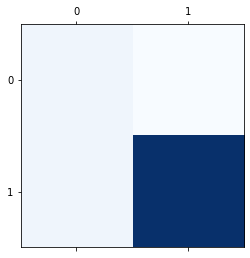

In [1158]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Судя по матрице неточностей можем сделать вывод о том, что алгоритм работает несколько лучше чем случайный лес (можно еще немного улучшить модель, меняя количество соседей и используя predict()).

### GaussianProcessClassifier

In [1159]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf_gpc = GaussianProcessClassifier(random_state=42).fit(X_train, y_train)
score = cross_val_score(clf_gpc, X_train, y_train, cv=2, scoring="accuracy")
print("Суммы оценок GaussianProcess: {}; Среднее: {}".format( score, np.mean(score)))

Суммы оценок GaussianProcess: [0.9625 0.9625]; Среднее: 0.9625


In [1160]:
#y_pred = clf_gpc.predict(X_train)
y_pred=cross_val_predict(clf_gpc, X_train, y_train, cv=2)

In [1161]:
confusion_matrix(y_train, y_pred)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[  0,  30],
       [  0, 770]], dtype=int64)

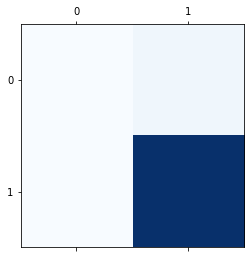

In [1162]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Можно заметить, что алгоритм работает плохо много ошибок FalsePositive

### GradientBoostingClassifier

In [1163]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier().fit(X_train, y_train)
score = cross_val_score(grad_boost, X_train, y_train, cv=2, scoring="accuracy")
print("Суммы оценок GradientBoosting: {}; Среднее: {}".format(score, np.mean(score)))

Суммы оценок GradientBoosting: [0.9525 0.9525]; Среднее: 0.9525


In [1164]:
y_pred = grad_boost.predict(X_train)
#y_pred=cross_val_predict(grad_boost, X_train, y_train, cv=2)

In [1165]:
confusion_matrix(y_train, y_pred)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[ 24,   6],
       [  0, 770]], dtype=int64)

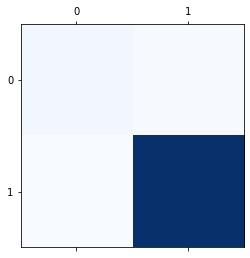

In [1166]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Заметим,что градиентный бустинг работает вполне неплохо

## Полнота и точность (Precision/recall tradeoff)

Рассмотри такое понятие как соотношение точность/полнота. Точность (precision) и полнота (recall) являются метриками,
которые используются при оценке большей части алгоритмов машинного обучения.
Полнота и точность описываются следующими формулами:
    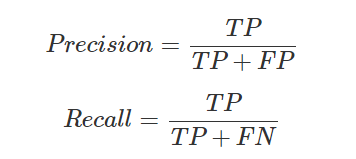

Где, 
**TP**-истинно-положительное решение
     
    
   

**TN**-истинно-отрицательное решение

**FP**-ложно-положительное решение

**FN**-ложно-отрицательное решение

Соотношение точности и полноты по сути показывают нам, на сколько мы будем больше охватывать нужных нам меток, жертвуя при этом точностью
прогноза (будет некоторое количество ложных прогнозов), или же наоборот на сколько точнее будет работать алгоритм (все метки будут определены правильно),
но при этом будут упущены верные метки, которые остались вне внимания метода машинного обучения

Как правило, нельзя напрямую влиять на значения точности и полноты. Это можно делать с помощью такого понятия, как порог(threshold). Визуализация вышесказанного:
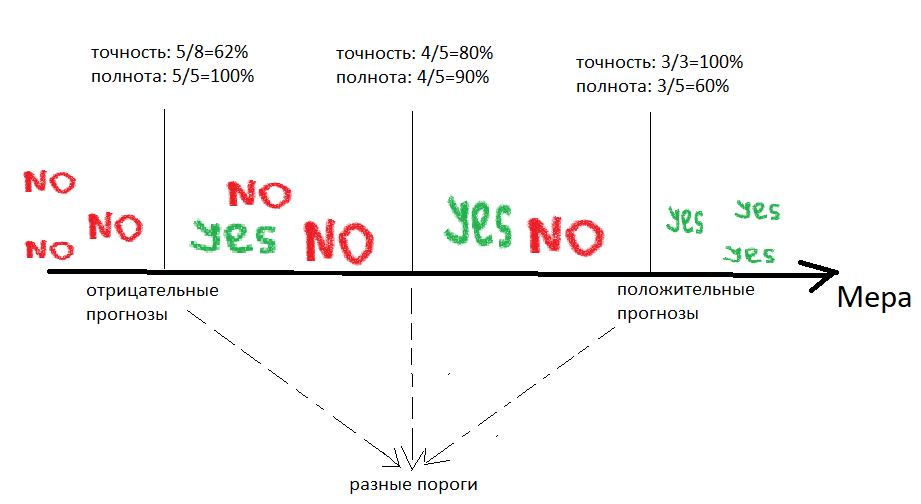

При поднятии порога  ложноположительная
классификация  становится истинно отрицательной,
увеличивая тем самым точность (вплоть до 100% в данном случае),
но одна истинно положительная классификация становится ложноотрицательной,
снижая полноту до 60%. И наоборот, снижение порога увеличивает
полноту и сокращает точность.

### RandomForestClassifier

In [1167]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [1168]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 3, method = "predict_proba")
y_probas_forest


array([[0.04, 0.96],
       [0.  , 1.  ],
       [0.02, 0.98],
       ...,
       [0.01, 0.99],
       [0.07, 0.93],
       [0.  , 1.  ]])

In [1169]:
y_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [1170]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_pred), 
                                                                   recall_score(y_train, y_pred), 
                                                                   f1_score(y_train, y_pred)
                                                                  ))

Precision score: 0.9625
Recall score: 1.0
F1 score: 0.980891719745223


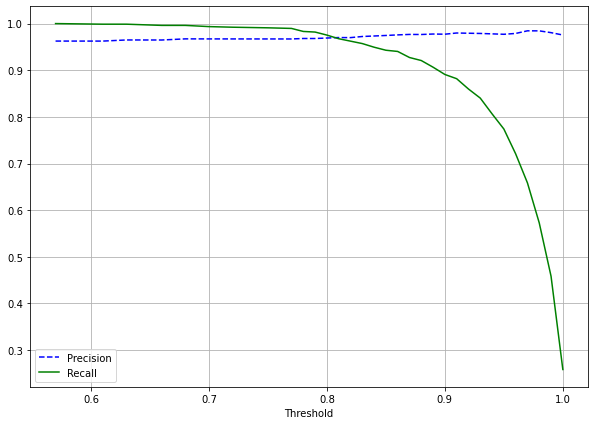

In [1171]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train, y_scores_forest)
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.show()

#Looks way better

### DecisionTreeClassifier

In [1172]:
Tree_clf = RandomForestClassifier(random_state = 42)
y_probas_Tree = cross_val_predict(Tree_clf, X_train, y_train, cv = 3, method = "predict_proba")
y_probas_Tree

array([[0.04, 0.96],
       [0.  , 1.  ],
       [0.02, 0.98],
       ...,
       [0.01, 0.99],
       [0.07, 0.93],
       [0.  , 1.  ]])

In [1173]:
y_pred = cross_val_predict(Tree_clf, X_train, y_train, cv=3)

In [1174]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_pred), 
                                                                   recall_score(y_train, y_pred), 
                                                                   f1_score(y_train, y_pred)
                                                                  ))

Precision score: 0.9625
Recall score: 1.0
F1 score: 0.980891719745223


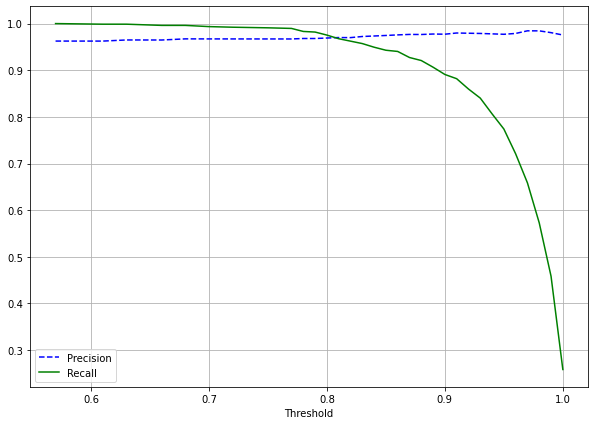

In [1175]:
y_scores_Tree = y_probas_Tree[:, 1]
precisions_Tree, recalls_Tree, thresholds_Tree = precision_recall_curve(y_train, y_scores_Tree)
plot_precision_recall_vs_threshold(precisions_Tree, recalls_Tree, thresholds_Tree)
plt.show()

#Looks way better

### KNeighborsClassifier

In [1176]:
KN_clf = KNeighborsClassifier(2,algorithm='brute')
y_probas_KN = cross_val_predict(KN_clf, X_train, y_train, cv = 3, method = "predict_proba")
#y_probas_KN

In [1177]:
y_pred = cross_val_predict(KN_clf, X_train, y_train, cv=3)

In [1178]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_pred), 
                                                                   recall_score(y_train, y_pred), 
                                                                   f1_score(y_train, y_pred)
                                                                  ))

Precision score: 0.9731182795698925
Recall score: 0.9402597402597402
F1 score: 0.9564068692206076


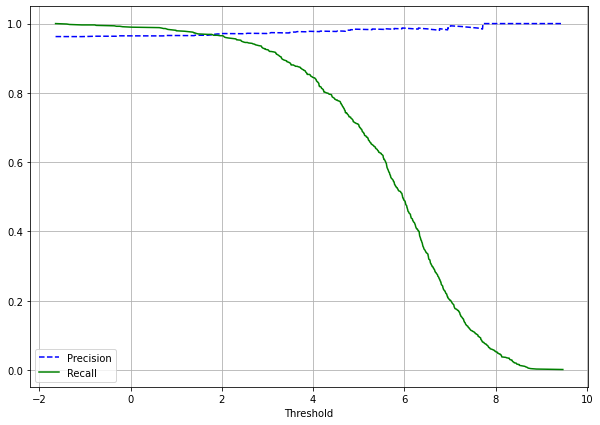

In [1179]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig = plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 'best')
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#Doesn't look promising ngl

### GaussianProcessClassifier

In [1180]:
clf_gpc = GaussianProcessClassifier(random_state=42)
y_probas_gpc= cross_val_predict(clf_gpc, X_train, y_train, cv = 3, method = "predict_proba")
y_probas_gpc 

array([[0.35113446, 0.64886554],
       [0.30103881, 0.69896119],
       [0.32792359, 0.67207641],
       ...,
       [0.20412416, 0.79587584],
       [0.38276568, 0.61723432],
       [0.26864792, 0.73135208]])

In [1181]:
y_pred = cross_val_predict(clf_gpc, X_train, y_train, cv=3)

In [1182]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_pred), 
                                                                   recall_score(y_train, y_pred), 
                                                                   f1_score(y_train, y_pred)
                                                                  ))

Precision score: 0.9625
Recall score: 1.0
F1 score: 0.980891719745223


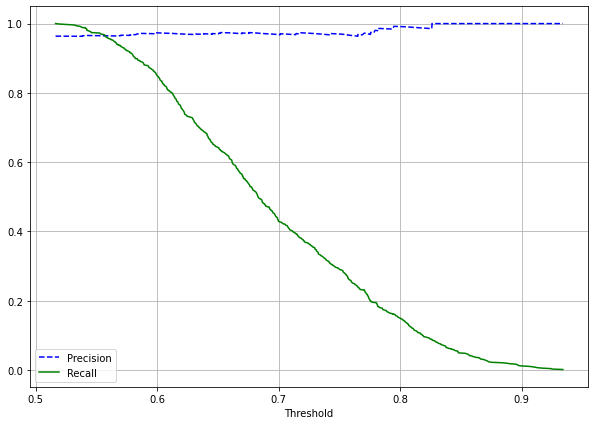

In [1183]:
y_scores_gpc = y_probas_gpc[:, 1]
precisions_gpc, recalls_gpc, thresholds_gpc = precision_recall_curve(y_train, y_scores_gpc)
plot_precision_recall_vs_threshold(precisions_gpc, recalls_gpc, thresholds_gpc)
plt.show()

#Looks way better

### GradientBoostingClassifier

Чтобы понять, какой порог использовать нужно получить суммы очков всех образцов в обучающем наборе.
Применим функцию cross_val_predict(),но на этот раз с указанием того, что вмес-
то прогнозов она должна возвратить суммы очков, управляющие решением:

In [1184]:
y_scores = cross_val_predict(grad_boost, X_train, y_train, cv=3, method="decision_function")

In [1185]:
#y_pred = cross_val_predict(grad_boost, X_train, y_train, cv=3)
y_pred = grad_boost.predict(X_train)
print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_pred), 
                                                                   recall_score(y_train, y_pred), 
                                                                   f1_score(y_train, y_pred)
                                                                  ))

Precision score: 0.9922680412371134
Recall score: 1.0
F1 score: 0.9961190168175938


Теперь с помощью сумм очков можно вычислить точность и полноту для всех
возможных порогов, используя функцию precision_recall_curve():

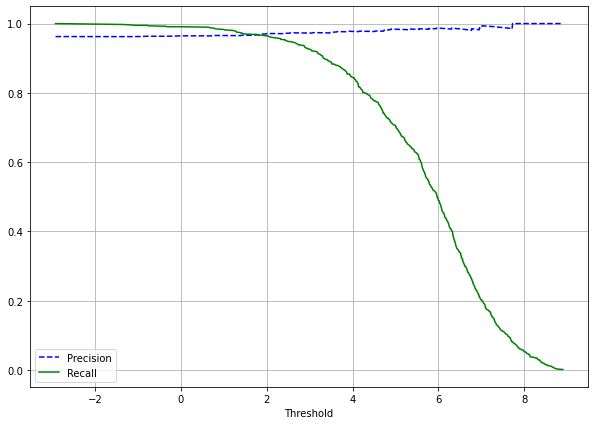

In [1186]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig = plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 'best')
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#Doesn't look promising ngl

# Результаты модели

Проверим результат работы программа на тестовых данных

In [1187]:
from sklearn.metrics import accuracy_score

## Score

**RandomForestClassifier**

In [1188]:
forest_clf=RandomForestClassifier(random_state = 42) #получение модели
forest_clf.fit(X_train, y_train) #применение метода fit , то есть загрузили данные для обучения
y_final = forest_clf.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("RandomForestClassifier", final_score))

RandomForestClassifier final score: 0.965


**DecisionTreeClassifier**

In [1189]:
Tree_clf = DecisionTreeClassifier(random_state=42)
Tree_clf.fit(X_train, y_train)
y_final = Tree_clf.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("DecisionTreeClassifier", final_score))

DecisionTreeClassifier final score: 0.94


**KNeighborsClassifier**

In [1190]:
KN_clf = KNeighborsClassifier(2,algorithm='brute') #загрузим модель с 2 соседями (это оптимальный вариант)
KN_clf.fit(X_train, y_train) #обучим модель
y_final = KN_clf.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("KNeighborsClassifier", final_score))

KNeighborsClassifier final score: 0.895


**GaussianProcessClassifier**

In [1191]:
clf_gpc = GaussianProcessClassifier(random_state=42).fit(X_train, y_train)
y_final = clf_gpc.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("GaussianProcessClassifier", final_score))

GaussianProcessClassifier final score: 0.965


**GradientBoostingClassifier**

In [1192]:
grad_boost = GradientBoostingClassifier().fit(X_train, y_train)
y_final = grad_boost.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("GradientBoostingClassifier", final_score))

GradientBoostingClassifier final score: 0.965


Стоит отметить хорошую работу всех алгоритмов МО, но точнее всех без выполняются GaussianProcessClassifier, GradientBoostingClassifier и Random Forest.

## Presicion/recall

Анализ полноты и точности разных алгоритмов машинного обучения.

In [1193]:
def predict_by_proba(X, model, threshold):
    y_probas = model.predict_proba(X)
    y_scores = y_probas[:, 1]
    y_pred = (y_scores >= threshold)
    return y_pred

In [1194]:
def predict_by_decision_func(X, model, threshold):
    y_scores = model.decision_function(X)
    y_pred = (y_scores >= threshold)
    return y_pred

In [1195]:
#нужно поместить только лучшую модель

**Random Forest**

In [1196]:
forest_clf.fit(X_train, y_train)
y_test_pred_forest = predict_by_proba(X_test, forest_clf,threshold=0.5)
print("For Random Forest:\nPrecision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_forest), 
                                                                   recall_score(y_test, y_test_pred_forest), 
                                                                   f1_score(y_test, y_test_pred_forest)
                                                                  ))

For Random Forest:
Precision score: 0.965
Recall score: 1.0
F1 score: 0.9821882951653944


**Decision Tree**

In [1197]:
Tree_clf.fit(X_train, y_train)
y_test_pred_Tree_clf = predict_by_proba(X_test, Tree_clf,threshold=1)
print("For Decision Tree:\nPrecision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test,y_test_pred_Tree_clf), 
                                                                   recall_score(y_test, y_test_pred_Tree_clf), 
                                                                   f1_score(y_test, y_test_pred_Tree_clf)
                                                                  ))

For Decision Tree:
Precision score: 0.9689119170984456
Recall score: 0.9689119170984456
F1 score: 0.9689119170984456


**KNeighborsClassifie**

In [1198]:
KN_clf.fit(X_train, y_train)
y_test_pred_KN_clf = predict_by_proba(X_test, KN_clf,threshold=1)
print("For KNeighborsClassifie:\nPrecision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_KN_clf), 
                                                                   recall_score(y_test, y_test_pred_KN_clf), 
                                                                   f1_score(y_test, y_test_pred_KN_clf)
                                                                  ))

For KNeighborsClassifie:
Precision score: 0.9725274725274725
Recall score: 0.917098445595855
F1 score: 0.9440000000000001


**GaussianProcessClassifier**

In [1199]:
clf_gpc.fit(X_train, y_train)
y_test_pred_clf_gpc = predict_by_proba(X_test, clf_gpc,threshold=0.5)
print("For GaussianProcessClassifier:\nPrecision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_clf_gpc), 
                                                                   recall_score(y_test,y_test_pred_clf_gpc), 
                                                                   f1_score(y_test, y_test_pred_clf_gpc)
                                                                  ))

For GaussianProcessClassifier:
Precision score: 0.965
Recall score: 1.0
F1 score: 0.9821882951653944


**GradientBoostingClassifier**

In [1200]:
grad_boost.fit(X_train, y_train)
y_test_pred_grad_boost = predict_by_proba(X_test, grad_boost,threshold=0.5)
print("For GradientBoostingClassifier:\nPrecision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_grad_boost), 
                                                                   recall_score(y_test, y_test_pred_grad_boost), 
                                                                   f1_score(y_test, y_test_pred_grad_boost)
                                                                  ))

For GradientBoostingClassifier:
Precision score: 0.9696969696969697
Recall score: 0.9948186528497409
F1 score: 0.9820971867007673


Стоит отметить хорошую работу всех алгоритмов МО, но точнее всех без потери полноты выполняются GaussianProcessClassifier и Random Forest.

# Elpigraph

In [1201]:
import elpigraph

from elpigraph.plot import PCA
from matplotlib.colors import LinearSegmentedColormap

#my_cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'white', 'black'])

def ColoredPlotPG(
    X, PG, 
    figsize=(15, 10), #figure settings
    X_color="r", X_cmap="hsv",  X_alpha=0.6, #data points settings
    node_color="black", node_size=50, #nodes settings
    edge_color="black", edge_linewidth=2, edge_alpha=0.6, #edges settings
    Do_PCA=True, DimToPlot=[0, 1],
):

    if Do_PCA:
        # Perform PCA on the nodes
        mv = PG["NodePositions"].mean(axis=0)
        data_centered = PG["NodePositions"] - mv
        vglobal, nodesp, explainedVariances = PCA(data_centered)
        # Rotate the data using eigenvectors
        BaseData = np.dot((X - mv), vglobal)
        DataVarPerc = np.var(BaseData, axis=0) / np.sum(np.var(X, axis=0))

    else:
        nodesp = PG["NodePositions"]
        BaseData = X
        DataVarPerc = np.var(X, axis=0) / np.sum(np.var(X, axis=0))

    f, ax = plt.subplots(1, 1, figsize=figsize)
    
    # scatter data
    if X_color is None:
        X_color = "r" #Che eto za kostyl'?
    ax.scatter(
        BaseData[:, DimToPlot[0]], BaseData[:, DimToPlot[1]], c=X_color, cmap=X_cmap, alpha=X_alpha
    )

    # scatter nodes
    ax.scatter(nodesp[:, DimToPlot[0]], nodesp[:, DimToPlot[1]], c=node_color, s=node_size)
    
    # plot edges
    Edges = PG["Edges"][0].T
    for j in range(Edges.shape[1]):
        x_coo = np.concatenate((nodesp[Edges[0, j], [0]], nodesp[Edges[1, j], [0]]))
        y_coo = np.concatenate((nodesp[Edges[0, j], [1]], nodesp[Edges[1, j], [1]]))
        ax.plot(x_coo, y_coo, c=edge_color, linewidth=edge_linewidth, alpha=edge_alpha)

    #axises
    if Do_PCA:
        TarPGVarPerc = explainedVariances / explainedVariances.sum() * 100
    else:
        TarPGVarPerc = np.var(PG["NodePositions"], axis=0) / np.sum(
            np.var(PG["NodePositions"], axis=0)
        )
    ax.set_xlabel(f"PG % var: {TarPGVarPerc[DimToPlot[0]]:.2f}")
    ax.set_ylabel(f"PG % var: {TarPGVarPerc[DimToPlot[1]]:.2f}")
    
    mappable = ax.collections[0]
    f.colorbar(mappable=mappable)
    return plt

In [1219]:
res = X_prep.append(X_prep_test)
X_data = res.values

In [1215]:
tree_60 = elpigraph.computeElasticPrincipalTree(X_data, 60)[0]

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
48 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  60  nodes on  1000  points and  48  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|0|0|0|4|5|3||60	3.4199	60	59	12	3	0	0	3.1925	3.1901	0.4389	0.4393	0.2269	0.0005	0.0306	1.8384	0


16.701  seconds elapsed


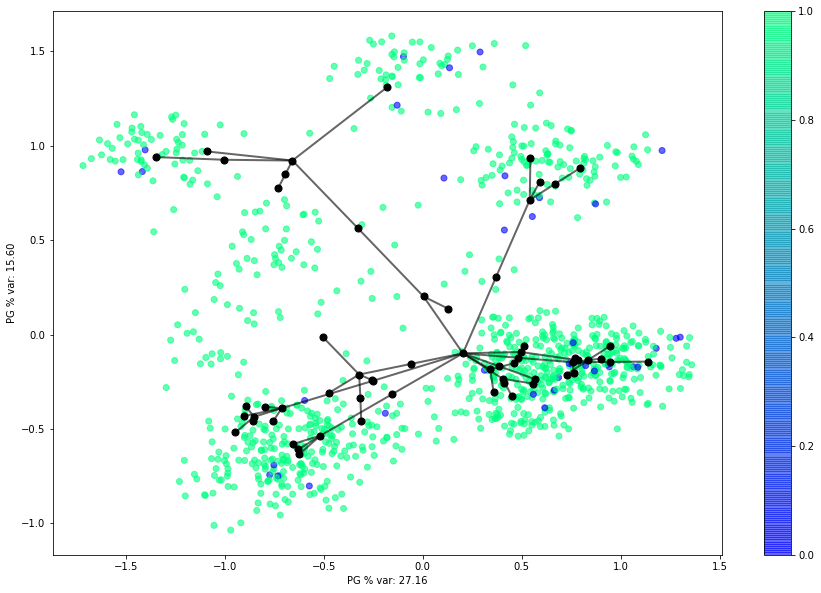

In [1216]:
plt = ColoredPlotPG(X_data, tree_60, X_color=y_data, X_cmap="winter")
plt.show()

Исследуем рисунок полученный из библиотеки Elpigraph. Если говорить о ходе работе этой библиотеки, то elpigraph работает в n-мерном пространстве, где n - кол-во признаков.  
Библиотека строит в n-мерном пространстве ребра, соединенные друг с другом в дерево так, чтобы вокруг ребер лежало достаточное количество точек из исходного набора данных. Результатом работы является проекция этого дерева на двумерную плоскость.
Если говорить о нашем случае, то видно, что данные разбились на некоторые касты, где в каждой касте присутстуют 
значения нашего предсказываего столбца y. Так как данные изначально были не сбалансированы, положительных значений (что гражданин окажется иностранцем),
помеченных зеленым цветом(1) гораздо больше, чем отрицательных значений (что гражданин окажется не иностранцем), помеченных синим цветом(0).  
Но, к сожалению, по данному рисунку сложно оценить корреляцию результируещего столбца от других признаков (так как и зеленые, и синие метки достаточно хаотично распологаются по имеющимся кастам). Но стоит отметить, что такая ситуация нормальна в некоторых ситуациях, так как в общем случае elpigraph был все-таки создан для обучения без учителя.


# Выводы:

Проведя вышепроделанную работу, можно сказать, что задача классификации освоена. Во время написания задачи были усвоены такие вещи как: Визуализация данных, подготовка данных к алгоритмам МО, а также были разобраны и применены некоторые базовые методы обучения. Стоит отметить, что была применена библиотека elpigraph для более глубокого понимания наших данных. 

# Источники информации

    Литература: 
    1)Beginning Programming with Python® bу john Paul Mueller
    2)Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron
    Интернет-ресурсы:
    1)https://scikit-learn.org/stable/
    2)https://github.com/ageron/handson-ml
    3)https://tproger.ru/translations/scikit-learn-in-python/